<a href="https://colab.research.google.com/github/yuvi9129/yuvi9129/blob/main/Copy_of_BANK_CUSTOMER_CHURN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BANK CUSTOMER CHURN MODEL

Learning Objective


1.Understand customer churn and its impact on banks.

2.Perform data analysis and preprocessing for churn prediction.

3.Build and evaluate predictive models using machine learning.

4.Interpret results and extract actionable insights.

5.Optimize model performance and address class imbalance.

6.Translate insights into business strategies to reduce churn.

7.Learn ethical considerations and model deployment basics.

8.Gain hands-on experience in end-to-end churn modeling.









**Get Understanding about Datasets**


This dataset contains information about bank customers to predict churn (whether they leave the bank). Key features include:

Demographics: Geography, Gender, Age, Surname.
Account Info: CreditScore, Tenure, Balance, Number of Products.
Behavior: Has Credit Card, Is Active Member.
Financials: Estimated Salary.
Target Variable: Churn (1 = Left, 0 = Stayed).

In [ ]:

# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data set
df = pd.read_csv(' https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
#Analyse data
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
df.duplicated('CustomerId').sum()

0

In [ ]:
df=df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


Encoding

In [ ]:
df['Geography'].value_counts()


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

<ipython-input-12-244e915e82a9>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.replace({'Gender':{'Male':0,'Female':0}},inplace=True)

<ipython-input-14-08cf7e050139>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':0}},inplace=True)


In [ ]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [ ]:
df.replace({'Num Of Products':{1: 0,2:1, 3:1, 4:1 }},inplace=True)

In [ ]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [ ]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [ ]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [ ]:
df['Zero Balance'] = np.where(df['Balance']>0,1,0)

<Axes: >

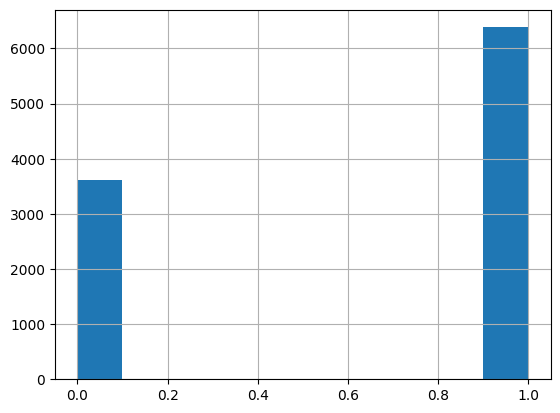

In [ ]:
df['Zero Balance'].hist()

In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [ ]:
X= df.drop(['Surname','Churn'],axis=1)

In [ ]:
y=df['Churn']

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

In [ ]:
df['Churn'].value_counts()
#

,count
Churn,
0,7963
1,2037


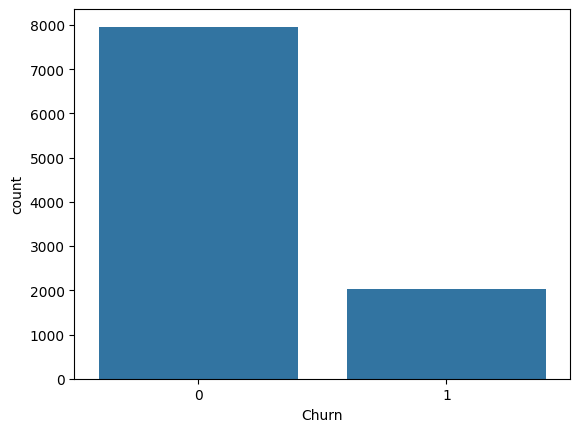

In [ ]:
sns.countplot(x='Churn',data=df);

In [ ]:
X.shape,y.shape

((10000, 11), (10000,))

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=2529)


In [ ]:
X_rus,y_rus = rus.fit_resample(X,y)

In [ ]:
X_rus.shape,y_rus.shape,X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_rus.value_counts()
#

,count
Churn,
0,2037
1,2037


<Axes: >

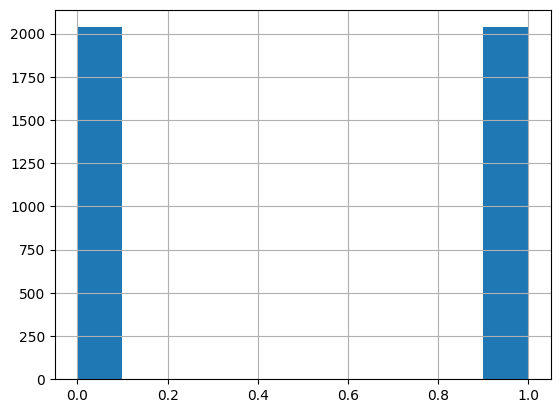

In [ ]:
y_rus.hist()
#

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2529)

In [ ]:
X_ros,y_ros = ros.fit_resample(X,y)

In [ ]:
X_ros.shape,y_ros.shape,X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: >

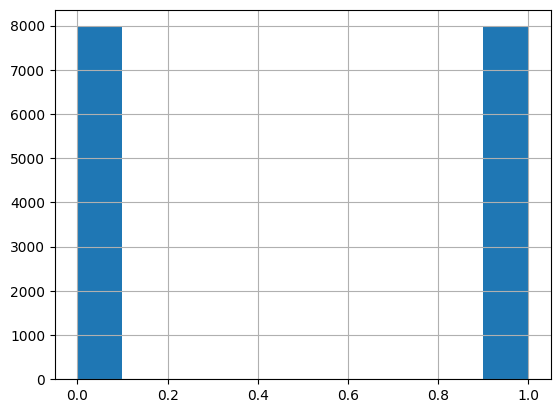

In [ ]:
y_ros.hist()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2529)

In [ ]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=2529)

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=2529)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])
#

In [ ]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test)

Model Accuracy

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2384,   30],
       [ 448,  138]])

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.82      0.24      0.37       586

    accuracy                           0.84      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.84      0.84      0.80      3000



Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight' : ['balanced']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 , cv = 2)

In [ ]:
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.0s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[2109,  305],
       [ 329,  257]])

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2414
           1       0.46      0.44      0.45       586

    accuracy                           0.79      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
 svc_rus = SVC()

In [ ]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()

In [ ]:
y_pred_rus=svc_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[464, 163],
       [179, 417]])

In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       627
           1       0.72      0.70      0.71       596

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [ ]:
param_grid = {'C': [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight' : ['balanced']}

In [ ]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 , cv = 2)

In [ ]:
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [ ]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [ ]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[468, 159],
       [180, 416]])

In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       627
           1       0.72      0.70      0.71       596

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [ ]:
svc_ros = SVC()

In [ ]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [ ]:
y_pred_ros = svc_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1841,  538],
       [ 677, 1722]])

In [ ]:
print( classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2379
           1       0.76      0.72      0.74      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [ ]:
param_grid = {'C': [0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight' : ['balanced']}

In [ ]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 , cv = 2)

In [ ]:
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [ ]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [ ]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[1974,  405],
       [  78, 2321]])

In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2379
           1       0.85      0.97      0.91      2399

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778



In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.82      0.24      0.37       586

    accuracy                           0.84      3000
   macro avg       0.83      0.61      0.64      3000
weighted avg       0.84      0.84      0.80      3000



In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2414
           1       0.46      0.44      0.45       586

    accuracy                           0.79      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.79      0.79      0.79      3000



In [ ]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       627
           1       0.72      0.70      0.71       596

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       627
           1       0.72      0.70      0.71       596

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [ ]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      2379
           1       0.76      0.72      0.74      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2379
           1       0.85      0.97      0.91      2399

    accuracy                           0.90      4778
   macro avg       0.91      0.90      0.90      4778
weighted avg       0.91      0.90      0.90      4778

